# Data Preparation


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
X_train = pd.read_csv("Training Data/Diabetes_XTrain.csv")
Y_train = pd.read_csv("Training Data/Diabetes_YTrain.csv")

X_test = pd.read_csv("Test Cases\Diabetes_Xtest.csv")
Y_test = pd.read_csv("Test Cases\sample_submission.csv")

In [19]:
X_train.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [20]:
Y_train.head(n=5)

,Outcome
0,1
1,0
2,1
3,1
4,0


In [21]:
X_train = X_train.values
Y_train = Y_train.values[:,0]

X_test = X_test.values
Y_test = Y_test.values[:,0]

In [22]:
print(X_train.shape)
print(Y_train.shape)

(576, 8)
(576,)


In [23]:
def edist(X1 ,X2):
    return np.sqrt(sum((X1 - X2)**2))

def knn(X_train, Y_train, query_point, k=5):
    vals = []
    m= Y_train.shape[0]

    for i in range(m):
        vals.append([edist(query_point, X_train[i]) , Y_train[i]])
    
    vals.sort() # This sorts the list in place
    vals = vals[:k]
    vals = np.array(vals)

    newVals = np.unique(vals[:,1] , return_counts= True)
    
    index = newVals[1].argmax()
    pred = newVals[0][index]

    return pred


In [24]:
pred = knn(X_train,Y_train,X_test[19])

(array([0, 1], dtype=int64), array([375, 201], dtype=int64))


Text(0, 0.5, 'outcome')

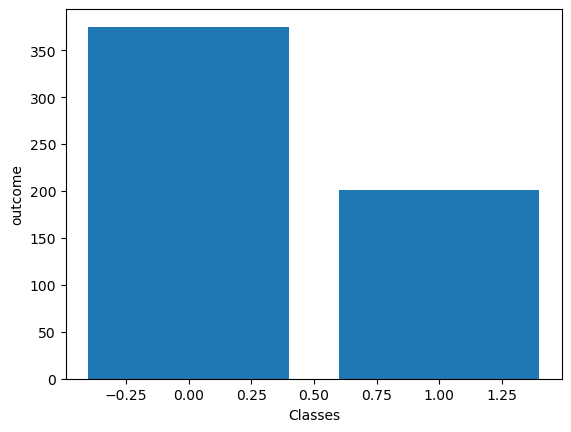

In [25]:
classes , counts = np.unique(Y_train , return_counts= True)
print(np.unique(Y_train , return_counts= True))
plt.bar(classes ,counts )
plt.xlabel("Classes")
plt.ylabel("outcome")

In [26]:
df = pd.DataFrame(knn(X_train , Y_train, X_test[i]) for i in range(X_test.shape[0]))
df.to_csv('output.csv', index=False)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load only the training files which have the real labels (Y_train)
X = pd.read_csv("Training Data/Diabetes_XTrain.csv").values
y = pd.read_csv("Training Data/Diabetes_YTrain.csv").values[:,0]

# Split into 80% training and 20% testing
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now run your KNN on X_val and compare against Y_val
predictions = [knn(X_train, Y_train, point) for point in X_val]
print(f"Real Accuracy: {accuracy_score(Y_val, predictions) * 100:.2f}%")

Real Accuracy: 69.83%
